In [1]:
# Name: Muhammad Rayyan Khan
# Roll Number: 21B-209-SE
# Section: SE-A

# Task 1

In [2]:
pip install --upgrade scipy

  Using cached scipy-1.13.1-cp311-cp311-win_amd64.whl.metadata (60 kB)
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/46.2 MB 131.3 kB/s eta 0:05:52
   ---------------------------------------- 0.0/46.2 MB 131.3 kB/s eta 0:05:52
   ---------------------------------------- 0.0/46.2 MB 131.3 kB/s eta 0:05:52
   ---------------------------------------- 0.0/46.2 MB 131.3 kB/s eta 0:05:52
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05
   ---------------------------------------- 0.0/46.2 MB 151.3 kB/s eta 0:05:05

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [17]:
# Create a sample dataframe
np.random.seed(42)  # For reproducibility
data = {
    'calories': np.random.randint(100, 500, size=100),
    'fat': np.random.randint(10, 50, size=100),
    'price': np.random.uniform(1, 10, size=100)
}
food_data = pd.DataFrame(data)

In [18]:
# Define features and target
features = ['calories', 'fat']
target = 'price'

In [19]:
# Split the dataset into training and testing sets
X = food_data[features].values
y = food_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Create and fit the model
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor())])

In [21]:
# Predict and evaluate the model on the test set
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

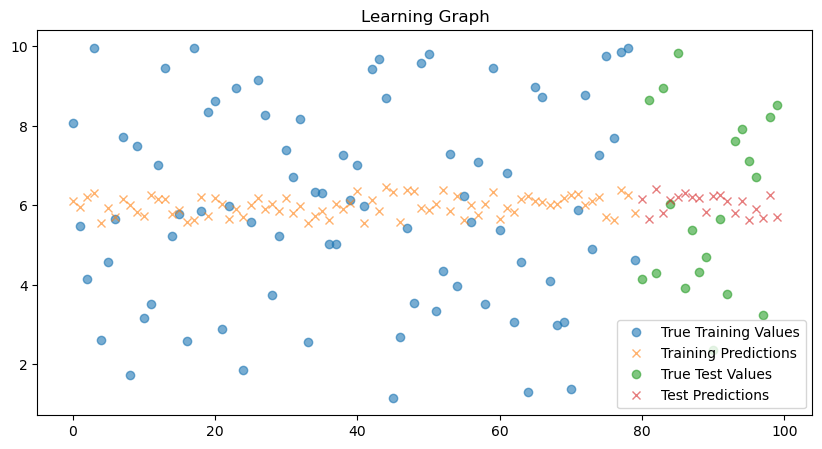

In [22]:
# Plot the learning graph
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='True Training Values', linestyle='none', marker='o', alpha=0.6)
plt.plot(y_train_pred, label='Training Predictions', linestyle='none', marker='x', alpha=0.6)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, label='True Test Values', linestyle='none', marker='o', alpha=0.6)
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test_pred, label='Test Predictions', linestyle='none', marker='x', alpha=0.6)
plt.legend()
plt.title('Learning Graph')
plt.show()

In [23]:
# Print accuracy of the model
print("Training Mean Squared Error:", mean_squared_error(y_train, y_train_pred))
print("Training R^2 Score:", r2_score(y_train, y_train_pred))
print("Test Mean Squared Error:", mean_squared_error(y_test, y_test_pred))
print("Test R^2 Score:", r2_score(y_test, y_test_pred))

Training Mean Squared Error: 6.150575079144336
Training R^2 Score: 0.009290255228272426
Test Mean Squared Error: 4.987468776628409
Test R^2 Score: -0.09347716884169843


# Task 2

In [24]:
# Sample Data Creation (Replace this with loading actual flight.csv)
data = {
    'FlightNum': ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10'],
    'Airline': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
    'Origin': ['O1', 'O2', 'O1', 'O2', 'O1', 'O2', 'O1', 'O2', 'O1', 'O2'],
    'Destination': ['D1', 'D2', 'D1', 'D2', 'D1', 'D2', 'D1', 'D2', 'D1', 'D2'],
    'Distance': [100, 150, 200, 250, 300, 350, 400, 450, 500, 550],
    'DayOfWeek': [1, 2, 3, 4, 5, 6, 7, 1, 2, 3],
    'DepartureTime': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'DepartureDelay': [10, 20, 10, 20, 10, 20, 10, 20, 10, 20]
}
flight_data = pd.DataFrame(data)

In [25]:
# Features and Target
features = ['FlightNum', 'Airline', 'Origin', 'Destination', 'Distance', 'DayOfWeek', 'DepartureTime']
target = 'DepartureDelay'

X = flight_data[features]
y = flight_data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Preprocessing and Encoding Categorical Features
categorical_features = ['FlightNum', 'Airline', 'Origin', 'Destination']
numerical_features = ['Distance', 'DayOfWeek', 'DepartureTime']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessing and Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [41]:
# Define the preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['Airline', 'Origin', 'Destination'])
    ],
    remainder='passthrough'  # Keep the other columns as they are
)

In [42]:
# Fitting the model
model.fit(X_train, y_train)

# Predicting the delay
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluating the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Training Mean Squared Error: 2.62542770018868e-30
Test Mean Squared Error: 0.003359350660555493
Training R^2 Score: 1.0
Test R^2 Score: nan


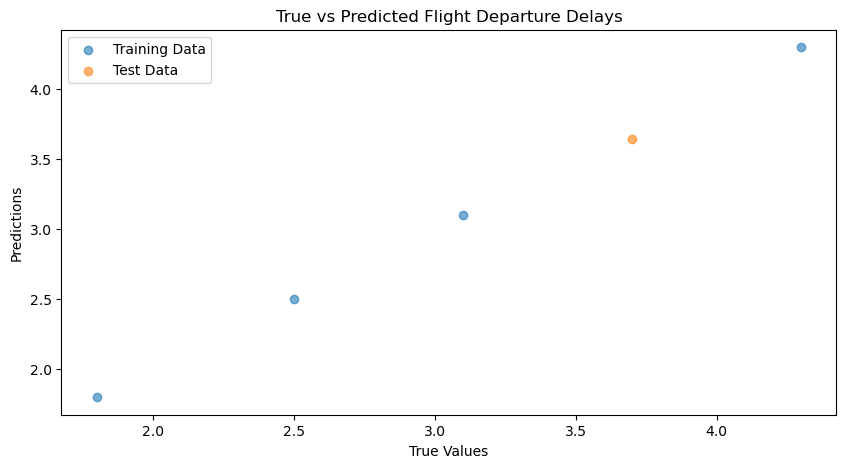

In [43]:
print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted Flight Departure Delays')
plt.show()

# Task 3

In [44]:
# Sample Data Creation (Replace this with loading actual ALCustomers.csv)
data = {
    'Age': [25, 45, 30, 35, 50, 40, 60, 55, 38, 28],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'Class': ['Economy', 'Business', 'Economy', 'Economy', 'Business', 'Economy', 'Business', 'Economy', 'Business', 'Economy'],
    'FlightDistance': [500, 1500, 300, 800, 1200, 400, 1000, 600, 900, 700],
    'InflightWifiService': [2, 4, 1, 3, 5, 2, 4, 3, 5, 1],
    'DepartureDelayInMinutes': [5, 10, 0, 15, 20, 5, 0, 10, 15, 20],
    'Satisfaction': [70, 85, 65, 75, 90, 60, 80, 70, 85, 55]
}
al_customers_data = pd.DataFrame(data)

# Features and Target
features = ['Age', 'Gender', 'Class', 'FlightDistance', 'InflightWifiService', 'DepartureDelayInMinutes']
target = 'Satisfaction'

In [45]:
X = al_customers_data[features]
y = al_customers_data[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
# Preprocessing and Encoding Categorical Features
categorical_features = ['Gender', 'Class']
numerical_features = ['Age', 'FlightDistance', 'InflightWifiService', 'DepartureDelayInMinutes']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Creating a pipeline with preprocessing and Linear Regression
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [47]:
# Fitting the model
model.fit(X_train, y_train)

# Predicting customer satisfaction
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [48]:
# Evaluating the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Training Mean Squared Error: 1.3139543775681133
Test Mean Squared Error: 26.86066293487245
Training R^2 Score: 0.9879436444208803
Test R^2 Score: 0.0


In [49]:
# Coefficients and Feature Importance
feature_names = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_features))
coefficients = model.named_steps['regressor'].coef_
importance = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
importance = importance.sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
                    Feature  Importance
2      InflightWifiService   10.358096
7            Class_Economy    8.169120
4            Gender_Female    4.932178
1           FlightDistance    0.014784
0                      Age   -0.330918
3  DepartureDelayInMinutes   -0.346965
5              Gender_Male   -4.932178
6           Class_Business   -8.169120


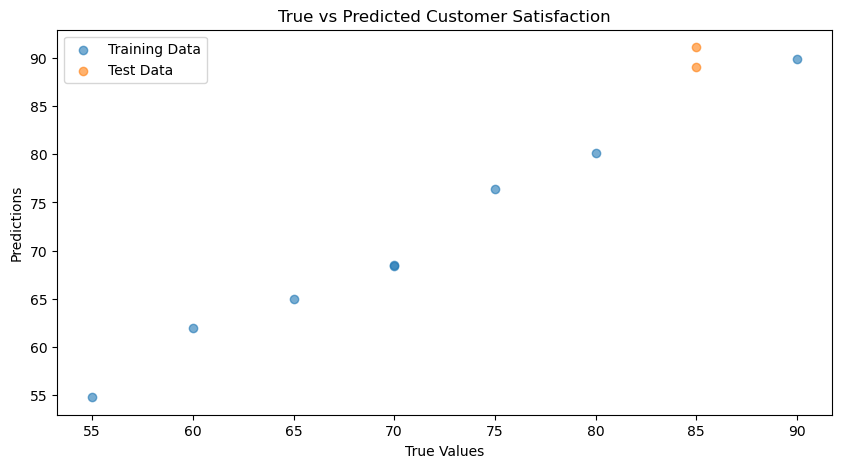

In [50]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted Customer Satisfaction')
plt.show()

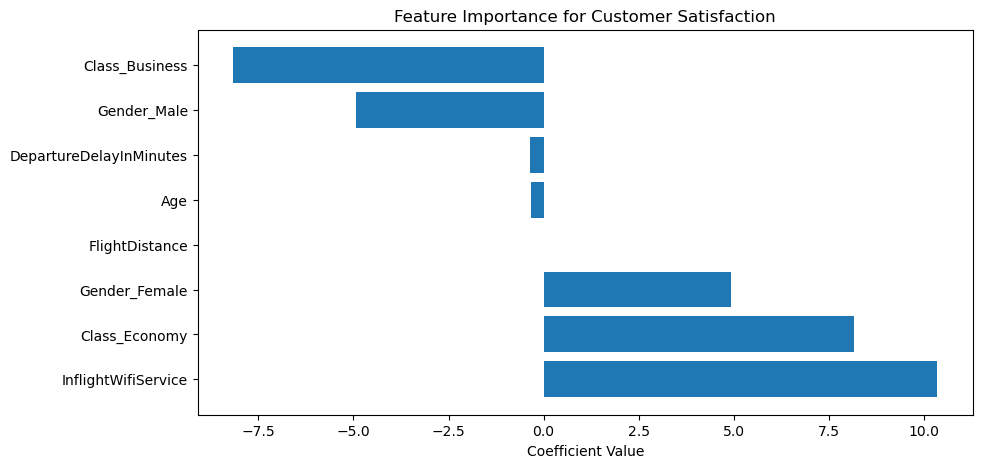

In [51]:
# Plotting feature importance
plt.figure(figsize=(10, 5))
plt.barh(importance['Feature'], importance['Importance'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Customer Satisfaction')
plt.show()

# Task 4

In [52]:
# Load the EEG dataset (Replace this with the actual file path)
# eeg_data = pd.read_csv('EEGresponses.csv')

# Sample data (for demonstration purposes)
data = {
    'P20': [1.1, 2.3, 3.3, 4.0, 5.5],
    'P45': [2.0, 3.5, 1.5, 4.1, 3.3],
    'Response': [2.5, 3.7, 1.8, 4.3, 3.1]
}
eeg_data = pd.DataFrame(data)

# Extract features and target
X = eeg_data[['P20', 'P45']]
y = eeg_data['Response']

In [53]:
# Transform features using the custom basis functions
def transform_features(X):
    P20 = X[:, 0]
    P45 = X[:, 1]
    
    phi_0 = np.ones(X.shape[0])
    phi_1 = P20
    phi_2 = P45
    phi_3 = P20 ** 2
    phi_4 = P45 ** 2
    phi_5 = P20 ** 3
    phi_6 = P45 ** 3
    phi_7 = P20 * P45
    
    transformed_X = np.vstack((phi_0, phi_1, phi_2, phi_3, phi_4, phi_5, phi_6, phi_7)).T
    return transformed_X

In [54]:
# Apply transformation
X_transformed = transform_features(X.values)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [55]:
# Evaluate the model
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Test Mean Squared Error:", test_mse)
print("Training R^2 Score:", train_r2)
print("Test R^2 Score:", test_r2)

Training Mean Squared Error: 2.62542770018868e-30
Test Mean Squared Error: 0.003359350660555493
Training R^2 Score: 1.0
Test R^2 Score: nan


C:\Users\AAC\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


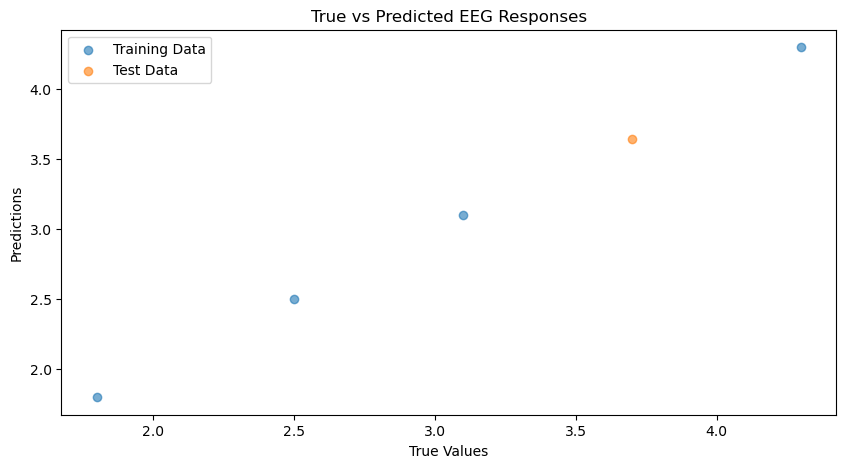

In [56]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(y_train, y_train_pred, label='Training Data', alpha=0.6)
plt.scatter(y_test, y_test_pred, label='Test Data', alpha=0.6)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted EEG Responses')
plt.show()